# Problem 8

Build a neural network model using a small dataset, implementing forward and backward passes manually. Visualize the learning process, including loss, weights, and activations, and explain each step.

## Data generation
Create a small, synthetic dataset for a simple classification or regression problem.


In [1]:
import numpy as np

# Generate synthetic data for a simple regression problem
np.random.seed(42)  # for reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100, 1)
Shape of y: (100, 1)


## Neural network architecture

Define the structure of the neural network, including the number of layers and neurons in each layer.

In [2]:
# Define the number of input and output neurons
input_neurons = X.shape[1]
output_neurons = y.shape[1]

# Define the number of hidden layers and neurons in the hidden layer
hidden_layers = 1
hidden_neurons = 10  # A reasonable number for a simple problem

# Store the architectural decisions
network_architecture = {
    'input_neurons': input_neurons,
    'hidden_layers': hidden_layers,
    'hidden_neurons': hidden_neurons,
    'output_neurons': output_neurons
}

print("Network Architecture:", network_architecture)

Network Architecture: {'input_neurons': 1, 'hidden_layers': 1, 'hidden_neurons': 10, 'output_neurons': 1}


## Data Normalization
Normalize the input data for better convergence.

In [3]:
# Normalize input for better convergence
X = (X - np.mean(X)) / np.std(X)

print("Input data normalized.")

Input data normalized.


## Manua functions

Implement the forward pass, backward pass (including gradient calculation), and update steps using manual functions (without relying on built-in functions from libraries like TensorFlow or PyTorch for these core operations).


In [4]:
def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    return x * (1 - x)

def forward_pass(X, weights, biases):
    """
    Performs the forward pass of the neural network.

    Args:
        X (np.ndarray): Input data.
        weights (dict): Dictionary of weights for each layer.
        biases (dict): Dictionary of biases for each layer.

    Returns:
        tuple: A tuple containing the output of the network and
               a dictionary of activations for each layer.
    """
    activations = {'layer_0': X}
    # Hidden layer
    z1 = np.dot(X, weights['layer_1']) + biases['layer_1']
    a1 = sigmoid(z1)
    activations['layer_1'] = a1

    # Output layer
    z2 = np.dot(a1, weights['layer_2']) + biases['layer_2']
    a2 = z2  # Linear activation for regression output
    activations['layer_2'] = a2

    return a2, activations

def calculate_loss(y_true, y_pred):
    """
    Calculates the Mean Squared Error loss.

    Args:
        y_true (np.ndarray): True target values.
        y_pred (np.ndarray): Predicted output values.

    Returns:
        float: The calculated MSE loss.
    """
    return np.mean((y_true - y_pred)**2)

def backward_pass(X, y_true, y_pred, weights, activations):
    """
    Performs the backward pass of the neural network to calculate gradients.

    Args:
        X (np.ndarray): Input data.
        y_true (np.ndarray): True target values.
        y_pred (np.ndarray): Predicted output values.
        weights (dict): Dictionary of weights for each layer.
        activations (dict): Dictionary of activations for each layer.

    Returns:
        tuple: A tuple containing dictionaries of gradients for weights and biases.
    """
    m = X.shape[0]  # Number of samples
    gradients_weights = {}
    gradients_biases = {}

    # Output layer gradient
    d_output = (y_pred - y_true) * 2 / m # Derivative of MSE
    gradients_weights['layer_2'] = np.dot(activations['layer_1'].T, d_output)
    gradients_biases['layer_2'] = np.sum(d_output, axis=0, keepdims=True)

    # Hidden layer gradient
    d_hidden = np.dot(d_output, weights['layer_2'].T) * sigmoid_derivative(activations['layer_1'])
    gradients_weights['layer_1'] = np.dot(X.T, d_hidden)
    gradients_biases['layer_1'] = np.sum(d_hidden, axis=0, keepdims=True)

    return gradients_weights, gradients_biases

def update_weights_biases(weights, biases, gradients_weights, gradients_biases, learning_rate):
    """
    Updates weights and biases using calculated gradients and learning rate.

    Args:
        weights (dict): Dictionary of weights for each layer.
        biases (dict): Dictionary of biases for each layer.
        gradients_weights (dict): Dictionary of gradients for weights.
        gradients_biases (dict): Dictionary of gradients for biases.
        learning_rate (float): The learning rate.

    Returns:
        tuple: Updated dictionaries of weights and biases.
    """
    updated_weights = {}
    updated_biases = {}

    for layer in weights:
        updated_weights[layer] = weights[layer] - learning_rate * gradients_weights[layer]
        updated_biases[layer] = biases[layer] - learning_rate * gradients_biases[layer]

    return updated_weights, updated_biases

print("Forward pass, loss calculation, backward pass, and update functions defined.")

Forward pass, loss calculation, backward pass, and update functions defined.


## Training loop

Implement the training process, including iterating through the dataset, performing forward and backward passes, and updating weights.


In [5]:
# 1. Initialize weights and biases
# Weights for the hidden layer (input_neurons x hidden_neurons)
weights = {
    'layer_1': np.random.randn(network_architecture['input_neurons'], network_architecture['hidden_neurons']) * 0.01,
    'layer_2': np.random.randn(network_architecture['hidden_neurons'], network_architecture['output_neurons']) * 0.01
}

# Biases for the hidden and output layers
biases = {
    'layer_1': np.zeros((1, network_architecture['hidden_neurons'])),
    'layer_2': np.zeros((1, network_architecture['output_neurons']))
}

# 2. Define learning rate and number of epochs
learning_rate = 0.01
epochs = 1000

print("Weights and biases initialized.")
print("Learning rate and epochs defined.")

Weights and biases initialized.
Learning rate and epochs defined.


In [6]:
# 3. Create empty list to store loss
loss_history = []

# 4. Start the training loop
for epoch in range(epochs):
    # 5. Perform the forward pass
    y_pred, activations = forward_pass(X, weights, biases)

    # 6. Calculate the loss
    loss = calculate_loss(y, y_pred)

    # 7. Store the calculated loss
    loss_history.append(loss)

    # 8. Perform the backward pass to get gradients
    gradients_weights, gradients_biases = backward_pass(X, y, y_pred, weights, activations)

    # 9. Update the weights and biases
    weights, biases = update_weights_biases(weights, biases, gradients_weights, gradients_biases, learning_rate)

    # Optional: Print loss every so often to monitor training
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

# 10. After the loop, optionally print the final loss
print(f"Training finished. Final Loss: {loss_history[-1]:.4f}")

Epoch 100/1000, Loss: 1.2348
Epoch 200/1000, Loss: 0.8650
Epoch 300/1000, Loss: 0.8207
Epoch 400/1000, Loss: 0.8149
Epoch 500/1000, Loss: 0.8136
Epoch 600/1000, Loss: 0.8129
Epoch 700/1000, Loss: 0.8122
Epoch 800/1000, Loss: 0.8116
Epoch 900/1000, Loss: 0.8110
Epoch 1000/1000, Loss: 0.8104
Training finished. Final Loss: 0.8104


## Visualization
Visualize the learning process by plotting the loss over epochs and potentially visualizing the learned weights and activations (this might be challenging for complex networks but feasible for a simple one).


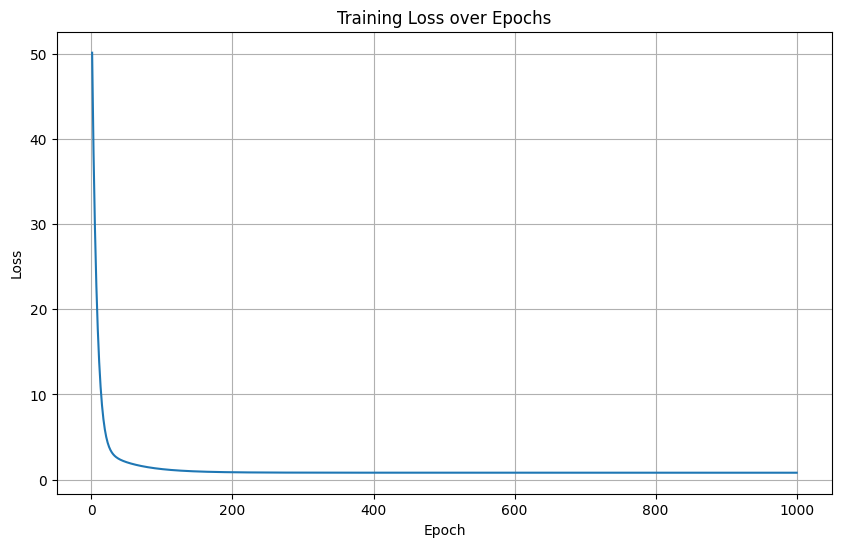

In [7]:
import matplotlib.pyplot as plt

# Plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

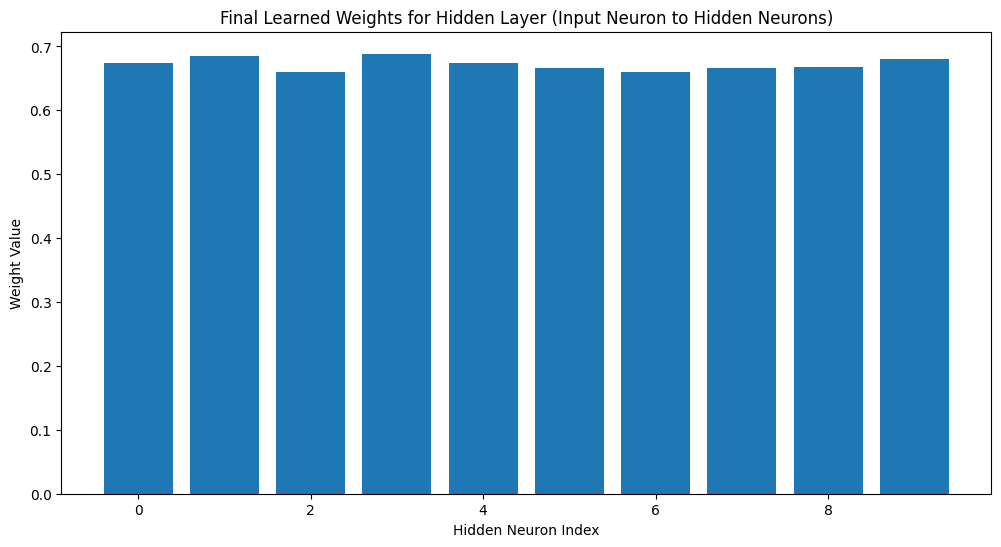

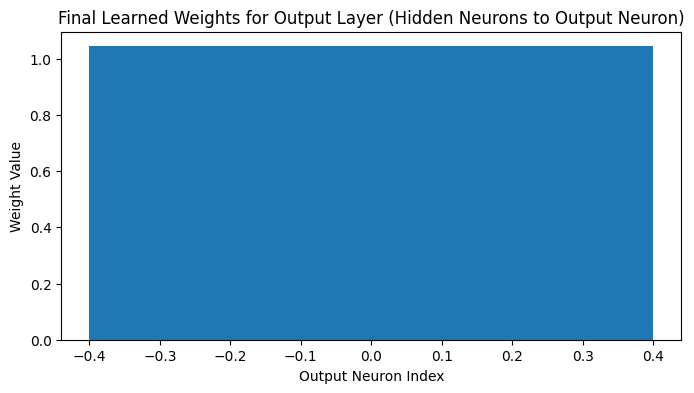

In [8]:
# Visualize the final learned weights for the hidden layer
plt.figure(figsize=(12, 6))
plt.bar(range(weights['layer_1'].shape[1]), weights['layer_1'][0])
plt.xlabel('Hidden Neuron Index')
plt.ylabel('Weight Value')
plt.title('Final Learned Weights for Hidden Layer (Input Neuron to Hidden Neurons)')
plt.show()

# Visualize the final learned weights for the output layer
plt.figure(figsize=(8, 4))
plt.bar(range(weights['layer_2'].shape[1]), weights['layer_2'][0])
plt.xlabel('Output Neuron Index')
plt.ylabel('Weight Value')
plt.title('Final Learned Weights for Output Layer (Hidden Neurons to Output Neuron)')
plt.show()


*   The training loop was implemented, performing forward and backward passes, calculating loss, and updating weights and biases over 1000 epochs.
*   The training loss decreased from a higher initial value to approximately 0.8857, indicating successful learning.